In [7]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv', index_col=0)

In [3]:
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
4,adding scripting functionality to net applicat...,"['c#', '.net']"
5,should i use nested classes in this case i am ...,['c++']
6,homegrown consumption of web services i have b...,['.net']
8,automatically update version number i would li...,['c#']


In [5]:
df['Tags'].iloc[0]

"['sql', 'asp.net']"

In [6]:
type(df['Tags'].iloc[0])

str

The ast module helps Python applications to process trees of the Python abstract syntax grammar. This module helps to find out programmatically what the current grammar looks like.

ast.literal_eval Safely evaluate an expression node or a string containing a Python literal. The string or node provided may only consist of the following Python literal structures: strings, bytes, numbers, tuples, lists, dicts, sets, booleans, None, bytes and sets.

Here we need only string literals in Tags which acts as labels for the Target variable.

In [8]:
ast.literal_eval(df['Tags'].iloc[0])

['sql', 'asp.net']

In [9]:
df['Tags'] = df['Tags'].apply(lambda x : ast.literal_eval(x))
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"[sql, asp.net]"
4,adding scripting functionality to net applicat...,"[c#, .net]"
5,should i use nested classes in this case i am ...,[c++]
6,homegrown consumption of web services i have b...,[.net]
8,automatically update version number i would li...,[c#]


Encoding Categorical features
A categorical variable is a variable whose values take on the value of labels. Almost all ML algorithms require data in numerical form. The encoding methods are necessary for the machine to interpret the Qualitative data(categorical data or labelled data) into numerical representation and learn the model from it.

Below are the most commonly used categorical variables/features using Scikit learn and pandas libraries.

1. LabelEncoder:
LabelEncoderis used to transform non-numerical labels to numerical labels. It encodes labels with a value between 0 and n_classes-1, where n is no. of distinct labels. Mostly Binary Columns are encoded using Label Encoder. It may be a perfect encoding method for categorical data as it has an order for example YES/NO,Male/Female etc. LabelEncoder can also be used to normalize labels.

For Multiclass it will give different (0 to n_classes-1) values for different classes eg. 0,1,2,3,….,n-1; which are actually categorical in nature and don’t have any intrinsic order. If LabelEncoder is used for multiclass columns the model will misinterpret the encoded data to be in some kind of order, (0<1<2).

2. OneHotEncoder:
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. One Hot Encoder can handle input string categorical and numeric data as well. It takes a column which has categorical data,splits the column into multiple columns based on labels or classes. The labels are replaced by 1s and 0s, depending on which column has what value. Consider a example that feature having 3 class labels: There are three columns, but logically thinking if you know one if one class is present (1) then automatically the other 2 classes are absent (0). Hence the two columns will be highly correlated which is not desired. This is called the variable-trap. In order to solve this, you can use the drop parameter in the OneHotEncoder. This way variable trap is eliminated.

image.png
3. get_dummies:
Pandas get_dummies method takes the categorical feature as an argument. Then it creates a Dummy Variable for every label in the feature, such that each dummy variable holds data as 1 or 0. 1 indicates the presence of a particular label and 0 indicates the absence of a particular label. Pandas get_dummies method is a very straight forward one-step procedure to get the dummy variables for categorical features.

The prefixsep(“”) is used to write column name [ “ColumnName”+ “” + “Class_Name” ] and drop_first = True is used to avoid variable trap, which is also called multicollinearity.

4. MultiLabel Binarize:
Multilabelbinarizer allows you to encode multiple labels per instance. It is used when any column has multiple labels. The input to this transformer should be an array-like of integers or strings,denoting the values taken on by categorical (discrete) features.

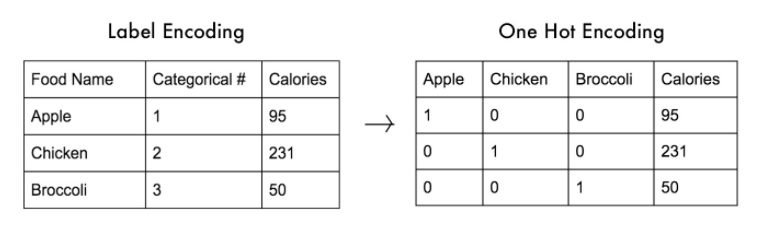

In [10]:
y = df['Tags']
y

2          [sql, asp.net]
4              [c#, .net]
5                   [c++]
6                  [.net]
8                    [c#]
                ...      
1262668             [c++]
1262834             [c++]
1262915          [python]
1263065          [python]
1263454             [c++]
Name: Tags, Length: 48976, dtype: object

In [11]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(df['Tags'])

In [12]:
y

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
multilabel.classes_

array(['.net', 'android', 'asp.net', 'c', 'c#', 'c++', 'css', 'html',
       'ios', 'iphone', 'java', 'javascript', 'jquery', 'mysql',
       'objective-c', 'php', 'python', 'ruby', 'ruby-on-rails', 'sql'],
      dtype=object)

In [15]:
pd.DataFrame(y, columns= multilabel.classes_)

,.net,android,asp.net,c,c#,c++,css,html,ios,iphone,java,javascript,jquery,mysql,objective-c,php,python,ruby,ruby-on-rails,sql
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48971,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48972,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### **TF-IDF vectorizer**

Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which are used to find word predictions, word similarities/semantics. The process of converting words into numbers are called Vectorization.

Machine learning algorithms cannot work with raw text directly.We need to transform that text into numbers. This process is called Text Vectorization.

Text Vectorization uses bag-of-words model to represents text data into vectors,when modeling text with machine learning algorithms.

we can do it in 3 ways using Scikit Learn library.

Word Counts with CountVectorizer Convert a collection of text documents to a matrix of token counts.
Word Frequencies with TfidfVectorizer Convert a collection of raw documents to a matrix of TF-IDF features.
Hashing with HashingVectorizer The main difference is that HashingVectorizer applies a hashing functionto term frequency counts in each document, where TfidfVectorizer scales those term frequency counts in each document by penalising terms that appear more widely across the corpus.
TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

This is done by multiplying two metrics:Term frequency gives how many times a word appears in a document and the inverse document frequency of the word across a set of documents.Multiplying these two metrics results in the TF-IDF score of a word in a document.

In [16]:
tfidf = TfidfVectorizer(analyzer='word', max_features=10000)
X = tfidf.fit_transform(df['Text'])
X.shape, y.shape

((48976, 10000), (48976, 20))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Build Model**

In [19]:
sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()

Multi-label classification problems must be assessed using different performance measures than single-label classification problems. Two of the most common performance metrics are hamming loss and Jaccard similarity.

Hamming loss is the average fraction of incorrect labels. Note that hamming loss is a loss function and that the perfect score is 0.

  \begin{align*} Hamming loss = \frac{TP + TN}{T} \end{align*}
where TP + TN + FP + FN =L(the total number of labels).

Jaccard similarity or the Jaccard index, is the size of the intersection of the predicted labels and the true labels divided by the size of the union of the predicted and true labels. It ranges from 0 to 1, and 1 is the perfect score.

  \begin{align*} Jaccard Score  = \frac{TP }{TP+FP+FN}\, if \,TN \neq 1 \end{align*}
Hamming and Jaccard similarity can be represented in terms of true/false positive/negative counts.

In [20]:
def j_score(y_true, y_pred):
  jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
  return jaccard.mean()*100


def print_score(y_pred, clf):
  print("Clf: ", clf.__class__.__name__)
  print('Jacard score: {}'.format(j_score(y_test, y_pred)))
  print('----')

In [21]:
for classifier in [sgd, lr, svc]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred, classifier)

Clf:  SGDClassifier
Jacard score: 50.94375255206206
----
Clf:  LogisticRegression
Jacard score: 49.548455151762624
----
Clf:  LinearSVC
Jacard score: 62.317952905948005
----


In [22]:
x = [ 'how to write ml code in python and java i have data but do not know how to do it']

In [23]:
xt = tfidf.transform(x)
clf.predict(xt)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [24]:
multilabel.inverse_transform(clf.predict(xt))

[('java', 'python')]